In [2]:
pip install "tensorflow<2.11"

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [148]:
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
warnings.filterwarnings('ignore')

In [149]:
data = pd.read_csv ('credit_train.csv') 

In [150]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [151]:
plt.rcParams['axes.facecolor'] = 'Beige'  # changed matplotlib axes facecolor to beige by using rc (runtime configuration) parameter

# Exploratory Data Analysis (EDA)

In [152]:
data.shape # 19 cloumns, 1,00,514 rows

(100514, 19)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

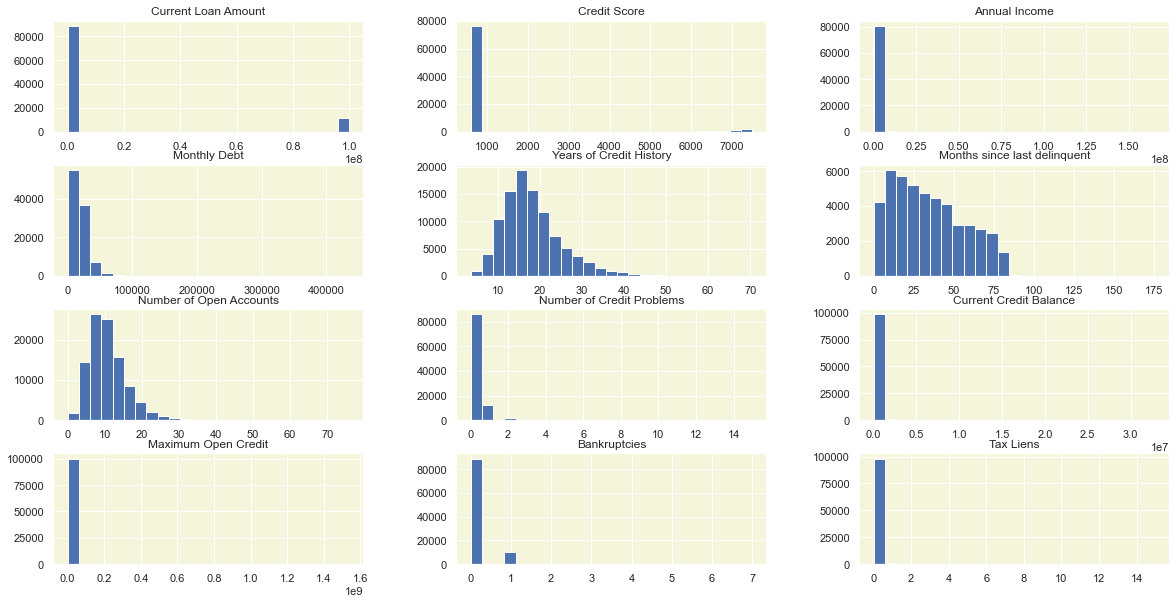

In [154]:
data.hist(bins=25,figsize=(20,10)); 

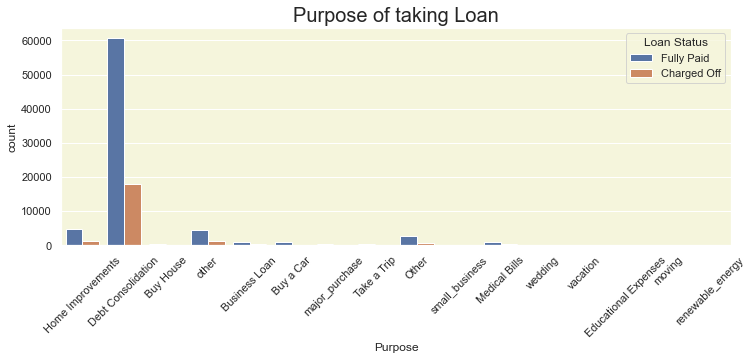

In [155]:
plt.figure(figsize=(12,4))
sns.countplot(x='Purpose',data=data,hue='Loan Status')
plt.xticks(rotation=45)
plt.title('Purpose of taking Loan',fontdict={'fontsize':20})
plt.show()


<AxesSubplot:xlabel='Loan Status', ylabel='count'>

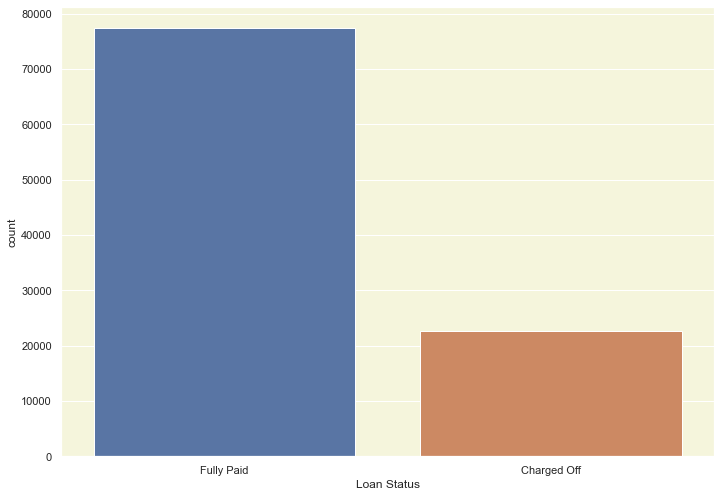

In [156]:
sns.countplot(x='Loan Status', data = data)

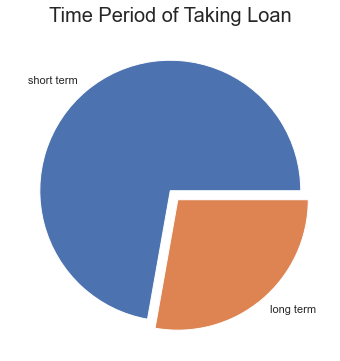

In [157]:
plt.figure(figsize=(6,6))
plt.pie(x=data['Term'].value_counts(),labels=['short term','long term'],explode=[0,0.09])
plt.title('Time Period of Taking Loan',fontdict={'fontsize':20})
plt.show()

# CORRELATION for understanding data

In [158]:
corr_matrix=data.corr()
corr_matrix

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.011248,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
Credit Score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,-0.003739,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
Annual Income,0.013112,-0.017078,1.000000,0.485230,0.161669,-0.077577,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
Monthly Debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,-0.056818,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
Years of Credit History,0.019282,-0.009720,0.161669,0.199289,1.000000,-0.044292,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
Months since last delinquent,0.011248,-0.003739,-0.077577,-0.056818,-0.044292,1.000000,-0.032569,0.104642,-0.028662,-0.008785,0.123951,0.012624
Number of Open Accounts,0.001478,0.006435,0.146175,0.411353,0.132349,-0.032569,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
Number of Credit Problems,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,0.104642,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
Current Credit Balance,0.003880,-0.000104,0.312340,0.481348,0.208470,-0.028662,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
Maximum Open Credit,-0.001271,-0.002827,0.053064,0.039268,0.031124,-0.008785,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029


<AxesSubplot:>

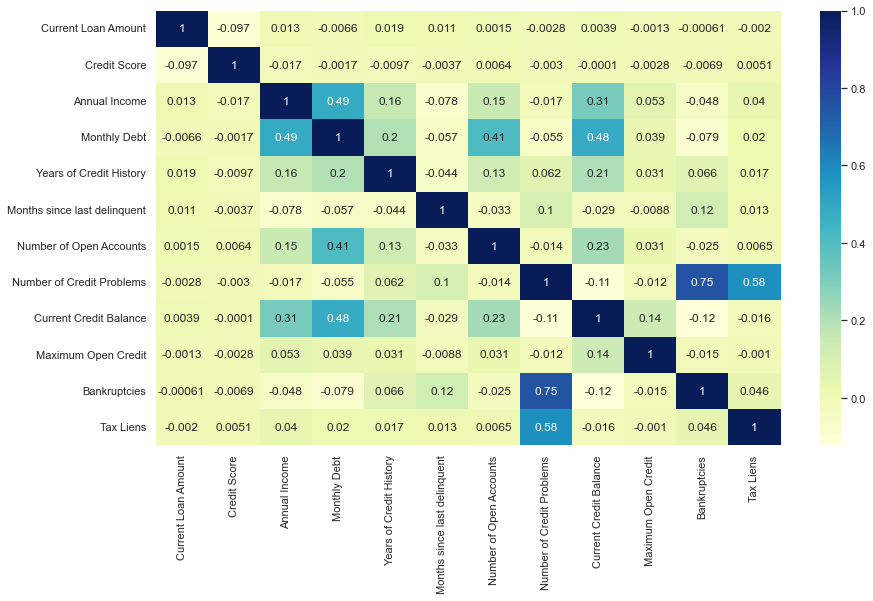

In [159]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [160]:
#Correlation Matrix establishes a relationship between two variables and determines whether it is proportional
#(more than 0.5), inversely proportional (smaller than -0.5), or has no relationship at all. (close to zero) 

We found this:

-Bankruptcy has a high correlation with number of credit problems as the bankrupt bank account is probably immeditely frozen after a bankruptcy.

-Tax liens also have a high correlation with number of credit problems.

-Monthly debt has a high correlation with both, current credit balance, annual income and number of open accounts.

In [161]:
data.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)


# PRE-PROCESSING


## Missing Data

In [162]:
print(data.isnull().values.any())

True


In [163]:
# Check the percentage of Nan in dataset
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data['Loan Status'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
Months since last delinquent,53655,0.53655
Credit Score,19668,0.19668
Annual Income,19668,0.19668
Years in current job,4736,0.04736
Bankruptcies,718,0.00718
Tax Liens,524,0.00524
Maximum Open Credit,516,0.00516
Current Credit Balance,514,0.00514
Number of Credit Problems,514,0.00514
Number of Open Accounts,514,0.00514


#### We have:
-> 51% missing data in total Months since last deliquent.

-> 19% in both credit score and annual income.

In [164]:
data.drop(columns = 'Months since last delinquent', axis=1, inplace=True) 
#Drop the columns with > 50% missin

In [165]:
#But if there's some rows with alot of missing values, we should remove all rows with more
#than 2 missing values as filling more than 2 rows could corrupt the data, we use threshold = 8.
print(data.dropna(axis=0,thresh=8).tail())

      Loan Status  Current Loan Amount        Term  Credit Score  \
99995  Fully Paid             147070.0  Short Term         725.0   
99996  Fully Paid           99999999.0  Short Term         732.0   
99997  Fully Paid             103136.0  Short Term         742.0   
99998  Fully Paid             530332.0  Short Term         746.0   
99999  Fully Paid           99999999.0  Short Term         743.0   

       Annual Income Years in current job Home Ownership             Purpose  \
99995       475437.0              7 years       Own Home               other   
99996      1289416.0               1 year           Rent  Debt Consolidation   
99997      1150545.0              6 years           Rent  Debt Consolidation   
99998      1717524.0              9 years           Rent  Debt Consolidation   
99999       935180.0                  NaN       Own Home  Debt Consolidation   

       Monthly Debt  Years of Credit History  Number of Open Accounts  \
99995       2202.86                  

In [166]:
data.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
data.drop(data.tail(514).index, inplace=True) 

In [168]:
data.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99995,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,4.0,1.0,45600.0,91014.0,1.0,0.0


In [169]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data['Loan Status'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit Score,19154,0.19154
Annual Income,19154,0.19154
Years in current job,4222,0.04222
Bankruptcies,204,0.00204
Tax Liens,10,0.00010
Maximum Open Credit,2,0.00002
Loan Status,0,0.00000
Current Loan Amount,0,0.00000
Term,0,0.00000
Home Ownership,0,0.00000


# Encoding Catagorical data

In [170]:
le = LabelEncoder()
data['Term']=le.fit_transform(data['Term'])
data['Years in current job']=le.fit_transform(data['Years in current job'])
data['Home Ownership']=le.fit_transform(data['Home Ownership'])
data['Purpose']=le.fit_transform(data['Purpose'])
data['Loan Status']=le.fit_transform(data['Loan Status'])

In [172]:
data.head(20)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,NaN,NaN,1,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,NaN,NaN,5,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
5,0,206602.0,1,7290.0,896857.0,1,1,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,1,217646.0,1,730.0,1184194.0,10,1,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
7,0,648714.0,0,NaN,NaN,10,1,1,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0
8,1,548746.0,1,678.0,2559110.0,2,3,3,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0
9,1,215952.0,1,739.0,1454735.0,10,3,3,39277.75,13.9,20.0,0.0,669560.0,1021460.0,0.0,0.0


# Filling missing data

filling data with mean, median or mode

(0.0, 1000.0)

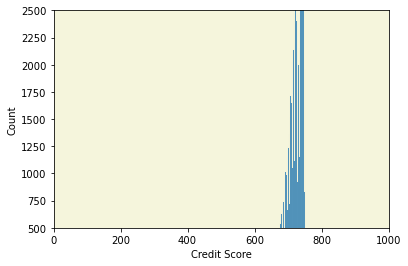

In [27]:
sns.histplot(x= 'Credit Score',data =data)

plt.ylim(500, 2500)
plt.xlim(0,1000)
# USE MEDIAN TO FILL DATA

(0.0, 2500.0)

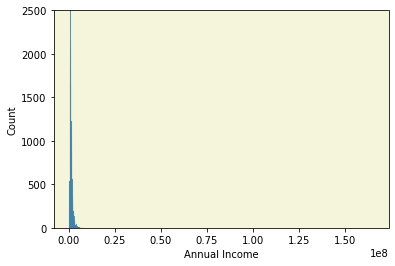

In [28]:
sns.histplot(x= 'Annual Income',data =data)
plt.ylim(0,2500)
#MEDIAN

<AxesSubplot:xlabel='Years in current job', ylabel='Count'>

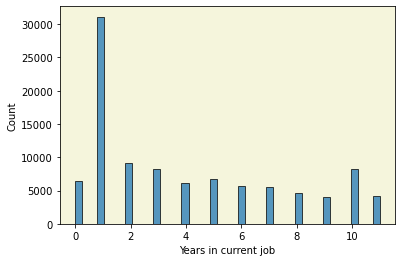

In [29]:
sns.histplot(x= 'Years in current job',data =data)
#MEAN

<AxesSubplot:xlabel='Bankruptcies', ylabel='Count'>

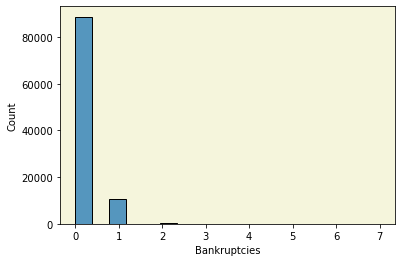

In [30]:
sns.histplot(x= 'Bankruptcies',data =data)
#MEDIAN

<AxesSubplot:xlabel='Tax Liens', ylabel='Count'>

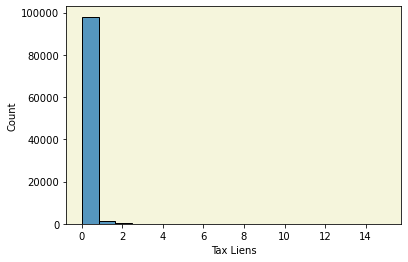

In [31]:
sns.histplot(x= 'Tax Liens',data =data)
#MODE

In [32]:
imputerl = SimpleImputer(strategy='median', missing_values=np.nan)
imputerl = imputerl.fit(data[['Credit Score']])
data['Credit Score'] = imputerl.transform(data[['Credit Score']])
imputer2 = SimpleImputer(strategy='median', missing_values=np.nan)
imputer2 = imputer2.fit(data[['Maximum Open Credit']])
data['Maximum Open Credit'] = imputer2.transform(data[['Maximum Open Credit']])
imputer3 = SimpleImputer(strategy='median', missing_values=np.nan)
imputer3 = imputer3.fit(data[['Annual Income']])
data['Annual Income'] = imputer3.transform(data[['Annual Income']])
imputer4 = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer4 = imputer4.fit(data[['Tax Liens']])
data['Tax Liens'] = imputer4.transform(data[['Tax Liens']])
imputer5 = SimpleImputer(strategy='median', missing_values=np.nan)
imputer5 = imputer5.fit(data[['Bankruptcies']])
data['Bankruptcies'] = imputer5.transform(data[['Bankruptcies']])
imputer6 = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer6 = imputer6.fit(data[['Years in current job']])
data['Years in current job'] = imputer5.transform(data[['Years in current job']])

In [33]:
data.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99995,1,147070.0,1,725.0,475437.0,7.0,2,11,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,1,99999999.0,1,732.0,1289416.0,0.0,3,3,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,1,103136.0,1,742.0,1150545.0,6.0,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,1,530332.0,1,746.0,1717524.0,9.0,3,3,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,1,99999999.0,1,743.0,935180.0,11.0,2,3,9118.10,13.0,4.0,1.0,45600.0,91014.0,1.0,0.0


# Outliers

[Text(0, 0, 'Loan Status'),
 Text(1, 0, 'Current Loan Amount'),
 Text(2, 0, 'Term'),
 Text(3, 0, 'Credit Score'),
 Text(4, 0, 'Annual Income'),
 Text(5, 0, 'Years in current job'),
 Text(6, 0, 'Home Ownership'),
 Text(7, 0, 'Purpose'),
 Text(8, 0, 'Monthly Debt'),
 Text(9, 0, 'Years of Credit History'),
 Text(10, 0, 'Number of Open Accounts'),
 Text(11, 0, 'Number of Credit Problems'),
 Text(12, 0, 'Current Credit Balance'),
 Text(13, 0, 'Maximum Open Credit'),
 Text(14, 0, 'Bankruptcies'),
 Text(15, 0, 'Tax Liens')]

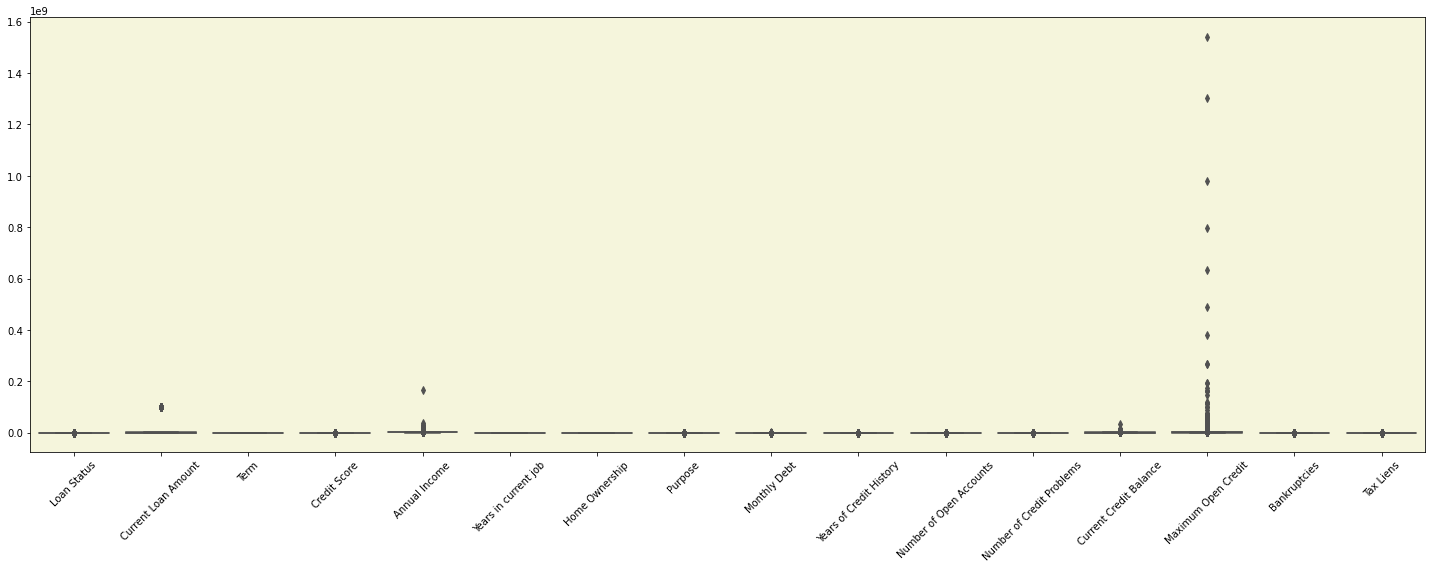

In [34]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

In [35]:
Q1 = np.percentile(data['Annual Income'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['Annual Income'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['Annual Income'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['Annual Income'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

Old Shape:  (100000, 16)
New Shape:  (93087, 16)


In [36]:
data = data.drop(data[data['Maximum Open Credit']>7.1**8].index)

[Text(0, 0, 'Loan Status'),
 Text(1, 0, 'Current Loan Amount'),
 Text(2, 0, 'Term'),
 Text(3, 0, 'Credit Score'),
 Text(4, 0, 'Annual Income'),
 Text(5, 0, 'Years in current job'),
 Text(6, 0, 'Home Ownership'),
 Text(7, 0, 'Purpose'),
 Text(8, 0, 'Monthly Debt'),
 Text(9, 0, 'Years of Credit History'),
 Text(10, 0, 'Number of Open Accounts'),
 Text(11, 0, 'Number of Credit Problems'),
 Text(12, 0, 'Current Credit Balance'),
 Text(13, 0, 'Maximum Open Credit'),
 Text(14, 0, 'Bankruptcies'),
 Text(15, 0, 'Tax Liens')]

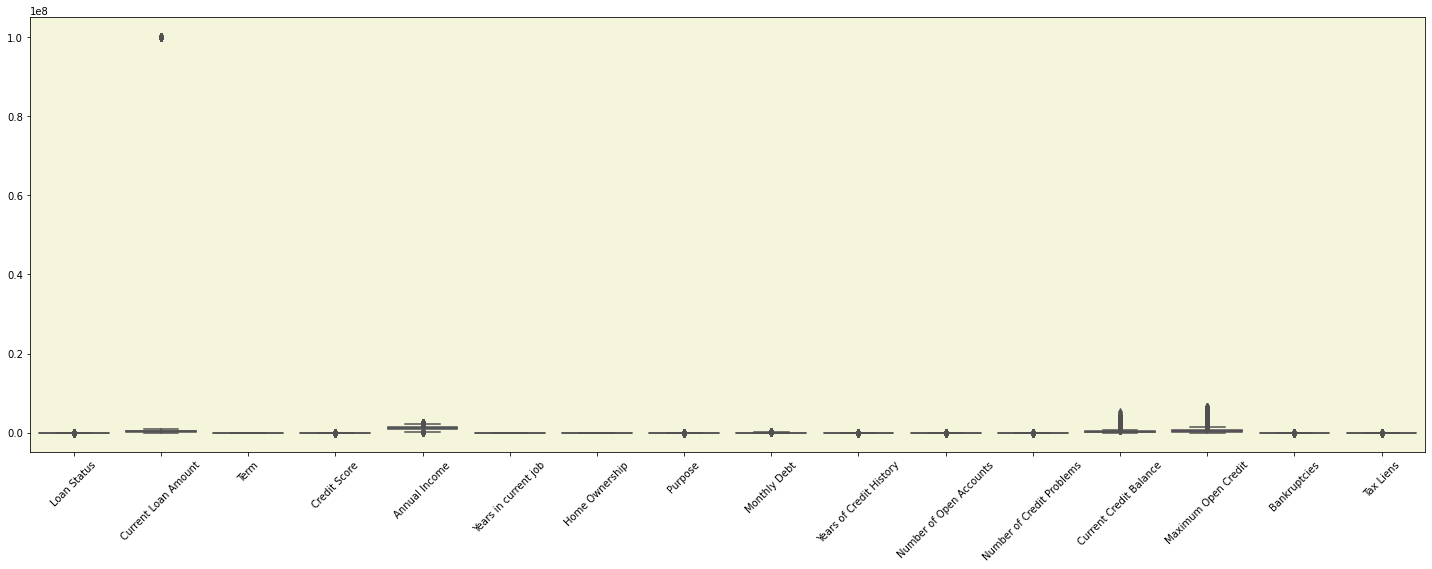

In [37]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

# VIF

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=data
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) 
for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

Loan Status                   4.802465
Current Loan Amount           1.180856
Term                          3.675121
Credit Score                  1.739506
Annual Income                10.181086
Years in current job          2.321346
Home Ownership                4.455917
Purpose                       3.539987
Monthly Debt                  6.957563
Years of Credit History       7.385807
Number of Open Accounts       7.435102
Number of Credit Problems     8.069631
Current Credit Balance        6.194095
Maximum Open Credit           6.130317
Bankruptcies                  5.512520
Tax Liens                     2.984734
dtype: float64

## Treatment of multicolinearity:

In [39]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

In [40]:
for i in range(10):
    vif_data=MC_remover(vif_data)
vif_data.head()

Annual Income has been removed
Number of Credit Problems has been removed
Number of Open Accounts has been removed
Years of Credit History has been removed
Current Credit Balance has been removed
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore


,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,8.0,1,5,5214.74,416746.0,1.0,0.0
1,1,262328.0,1,724.0,1.0,1,3,33295.98,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,8.0,2,3,29200.53,750090.0,0.0,0.0
3,1,347666.0,0,721.0,3.0,2,3,8741.90,386958.0,0.0,0.0
4,1,176220.0,1,724.0,5.0,3,3,20639.70,427174.0,0.0,0.0


### CALCULATING VIF FOR OTHER COLOUMNS

In [41]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

(Loan Status             4.236018
 Current Loan Amount     1.180277
 Term                    3.562582
 Credit Score            1.656837
 Years in current job    2.279806
 Home Ownership          4.251398
 Purpose                 3.343688
 Monthly Debt            3.716726
 Maximum Open Credit     2.599917
 Bankruptcies            1.125139
 Tax Liens               1.014959
 dtype: float64,
 11)

# SPLITTING DATA

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x= data.drop(['Loan Status' ] , axis=1).values
y = data['Loan Status'].values


In [44]:
y.sum()

71272

In [45]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.2 , random_state= 42)

In [46]:
print('X TRAIN SHAPE:',x_train.shape ,' X TEST SHAPE:',x_test.shape)


X TRAIN SHAPE: (74251, 15)  X TEST SHAPE: (18563, 15)


In [47]:
y_train.shape

(74251,)


# Scaling

In [48]:
from sklearn.preprocessing import StandardScaler 

In [49]:
scalar = StandardScaler()


In [50]:
x_train = scalar.fit_transform(x_train)

In [51]:
x_test = scalar.fit_transform(x_test)

In [52]:
x_train.shape

(74251, 15)

#  MODELS

## 1) LOGISTIC REGRESSIN:


In [173]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter = 1500)



,Y_test,Y_predict
0,1,1.0
1,1,1.0
2,0,1.0
3,1,1.0
4,1,1.0


#### TRAINING

In [120]:
lg.fit(x_train , y_train)


LogisticRegression(max_iter=1500)

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [127]:
x_pred=lg.predict(x_train)
print(x_pred)
print(y_test)

[1 1 1 ... 0 1 1]
[1 1 0 ... 1 1 1]


In [123]:
lg.fit(x_train,y_train)
predict=lg.predict(x_test)
from sklearn.metrics import classification_report
report=classification_report(y_test,predict)
print(report)


              precision    recall  f1-score   support

           0       0.99      0.20      0.34      4221
           1       0.81      1.00      0.90     14342

    accuracy                           0.82     18563
   macro avg       0.90      0.60      0.62     18563
weighted avg       0.85      0.82      0.77     18563



In [124]:
from sklearn.metrics import  f1_score
f1 = f1_score(y_test, predict, average='binary')
print(f1)

0.8950835024192291


In [59]:
from sklearn.metrics import  precision_score, recall_score, f1_score, accuracy_score
p = precision_score(y_test, predict, average='binary')
r=recall_score(y_test,predict,average='binary')
f1=f1_score(y_test, predict, average='binary')
a=accuracy_score(y_test,predict)
print('p' ,p)
print('r', r)
print('f1',f1)
print('a',a)

p 0.8103204657209065
r 0.999651373588063
f1 0.8950835024192291
a 0.8189409039487152


In [60]:
y_predict = lg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_predict" : y_predict})
df

,Y_test,Y_predict
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
18558,0,1
18559,1,1
18560,1,1
18561,1,1


In [130]:
X=np.array([[1.0,147070.0,1,725.0,475437.0,7.0,2,11,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0]])
X
lg.predict(X)

array([1])

# 2) KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [62]:
knn.fit(x_train,y_train)
predict=knn.predict(x_test)
from sklearn.metrics import classification_report
report=classification_report(y_test,predict)
print(report)


              precision    recall  f1-score   support

           0       0.57      0.30      0.40      4221
           1       0.82      0.93      0.87     14342

    accuracy                           0.79     18563
   macro avg       0.69      0.62      0.63     18563
weighted avg       0.76      0.79      0.76     18563



In [63]:
from sklearn.metrics import  precision_score, recall_score, f1_score, accuracy_score
p = precision_score(y_test, predict, average='binary')
r=recall_score(y_test,predict,average='binary')
f1=f1_score(y_test, predict, average='binary')
a=accuracy_score(y_test,predict)
print('p' ,p)
print('r', r)
print('f1',f1)
print('a',a)

p 0.8198441430938209
r 0.9315994979779668
f1 0.8721564019713437
a 0.7889888487852179


# 3) Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
predict=model.predict(x_test)
from sklearn.metrics import classification_report
report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.37      0.47      0.42      4221
           1       0.83      0.76      0.80     14342

    accuracy                           0.70     18563
   macro avg       0.60      0.62      0.61     18563
weighted avg       0.73      0.70      0.71     18563



<AxesSubplot:>

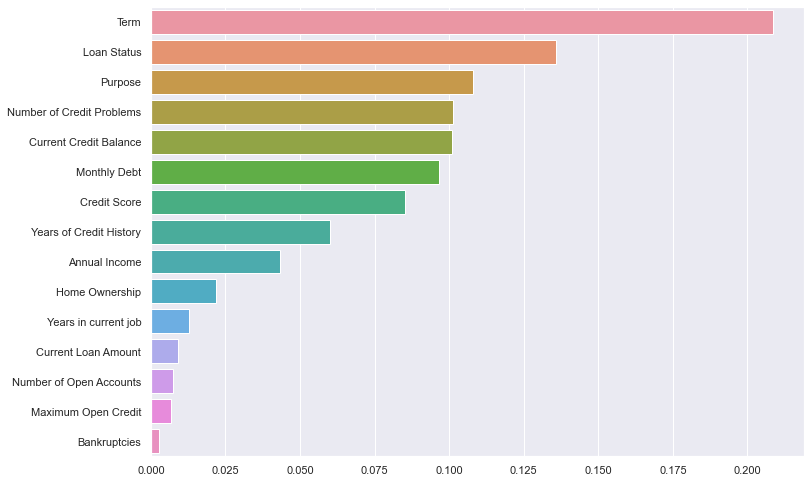

In [65]:
feature_importances = model.feature_importances_
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = data.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(sorted_importances, sorted_feature_names)

In [66]:
model.score(x_train,y_train)

1.0

In [67]:
model.score(x_test,y_test)

0.6980014006356731

In [68]:
from sklearn.metrics import  f1_score

In [69]:
from sklearn.metrics import  precision_score, recall_score, f1_score, accuracy_score
p = precision_score(y_test, predict, average='binary')
r=recall_score(y_test,predict,average='binary')
f1=f1_score(y_test, predict, average='binary')
a=accuracy_score(y_test,predict)
print('p' ,p)
print('r', r)
print('f1',f1)
print('a',a)

p 0.8311599696739954
r 0.7643982708129968
f1 0.7963823913990993
a 0.6980014006356731


# 4) Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier(n_estimators= 8 , max_depth=10 ,max_features=15)

In [72]:
rf.fit(x_train , y_train)
predict=rf.predict(x_test)
from sklearn.metrics import  precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
p = precision_score(y_test, predict, average='binary')
r=recall_score(y_test,predict,average='binary')
f1=f1_score(y_test, predict, average='binary')
a=accuracy_score(y_test,predict)
report=classification_report(y_test,predict)
print(report)
print('p' ,p)
print('r', r)
print('f1',f1)
print('a',a)

              precision    recall  f1-score   support

           0       0.98      0.21      0.34      4221
           1       0.81      1.00      0.89     14342

    accuracy                           0.82     18563
   macro avg       0.89      0.60      0.62     18563
weighted avg       0.85      0.82      0.77     18563

p 0.8106180665610143
r 0.9986054943522521
f1 0.8948453608247424
a 0.8186715509346549


# 5) NEURAL NETWORK

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [74]:
model = Sequential(
    [               
        tf.keras.Input(shape=(15,)),
        Dense(35, activation='relu',name='dense'),
        Dense(25, activation ='relu',name='dense_1'),
        Dense(15, activation='relu',name='dense_2'),
        
        Dense(1, activation='softmax',name='dense_3')#specify input size
        
       
    ], name = "my_model" 
)  

In [75]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 35)                560       
                                                                 
 dense_1 (Dense)             (None, 25)                900       
                                                                 
 dense_2 (Dense)             (None, 15)                390       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,866
Trainable params: 1,866
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

history =model.fit(
    x_train,y_train,
    
    epochs=50,
    batch_size=20
    
)

Epoch 1/50
3713/3713 [==============================] - 22s 3ms/step - loss: 0.4202 - accuracy: 0.7667
Epoch 2/50
3713/3713 [==============================] - 10s 3ms/step - loss: 0.4203 - accuracy: 0.7667
Epoch 3/50
3713/3713 [==============================] - 10s 3ms/step - loss: 0.4201 - accuracy: 0.7667
Epoch 4/50
3713/3713 [==============================] - 11s 3ms/step - loss: 0.4195 - accuracy: 0.7667
Epoch 5/50
3713/3713 [==============================] - 11s 3ms/step - loss: 0.4196 - accuracy: 0.7667
Epoch 6/50
3713/3713 [==============================] - 13s 3ms/step - loss: 0.4198 - accuracy: 0.7667
Epoch 7/50
3713/3713 [==============================] - 13s 3ms/step - loss: 0.4191 - accuracy: 0.7667
Epoch 8/50
3713/3713 [==============================] - 12s 3ms/step - loss: 0.4188 - accuracy: 0.7667
Epoch 9/50
3713/3713 [==============================] - 11s 3ms/step - loss: 0.4187 - accuracy: 0.7667
Epoch 10/50
3713/3713 [==============================] - 11s 3ms/step - l

In [86]:
predict=model.predict(x_test)


581/581 [==============================] - 6s 1ms/step


In [87]:
from sklearn.metrics import  precision_score, recall_score, f1_score, accuracy_score
p = precision_score(y_test, predict, average='binary')
r=recall_score(y_test,predict,average='binary')
f1=f1_score(y_test, predict, average='binary')
a=accuracy_score(y_test,predict)
print('p' ,p)
print('r', r)
print('f1',f1)
print('a',a)

p 0.772612185530356
r 1.0
f1 0.8717216228536696
a 0.772612185530356


In [88]:
print(y_test)

[1 1 0 ... 1 1 1]


In [89]:
print(predict)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [90]:

df = pd.DataFrame({"Y_test": y_test , "Y_predict" : predict.flatten()})
df.head(30)

,Y_test,Y_predict
0,1,1.0
1,1,1.0
2,0,1.0
3,1,1.0
4,1,1.0
5,1,1.0
6,1,1.0
7,1,1.0
8,1,1.0
9,1,1.0


In [91]:
import pickle

In [99]:
# data = {"model": lg}
# with open('saved_steps.pkl', 'wb') as file:
#     pickle.dump(data, file)


In [132]:
# with open('saved_steps.pkl', 'rb') as file:
#     data = pickle.load(file)

# regressor_loaded = data["model"]


In [140]:
import pickle
# now you can save it to a file
file = 'ML_Model1.pkl'
with open(file, 'wb') as f:
    pickle.dump(lg, f)

In [141]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [144]:
cy = k.predict([[1,147070.0,1,725.0,475437.0,7.0,2,11,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0]])
print(cy)


[1]


In [135]:
# Current Loan Amount, Term, Credit Score, Annual Income, Years in current job, Home Ownership, Purpose, Monthly Debt, 
# Years of Credit History, Number of Open Accounts, Number of Credit Problems, Current Credit Balance, Maximum Open Credit,
# Bankruptcies, Tax Liens, Loan Status. 
X=np.array([[1.0,147070.0,1,725.0,475437.0,7.0,2,11,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0]])
X
lg.predict(X)


array([1])